In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

$$
\begin{align}
\sigma_t(t,x) &= \tau\left[0\le ct-x\le cT_x\right]\sin(ct-x)\\
\end{align}
$$

In [30]:
N=1000
c=1/100
Tx=10
cycles=8

def pulse_y():
    return np.array([np.sin(2*np.pi*i*cycles/(N-1)) for i in range(N)])

def pulse_x(t):
    xo = float(c*t)
    xe = float(xo-c*Tx)
    return np.array([x for x in np.arange(xo,xe,(xe-xo)/N) if x>=0 ], dtype=float)

def echo_x(t,d):
    xo = 2*d-float(c*t)
    xe = xo + c*Tx
    return np.array([x for x in np.arange(xo,xe,(xe-xo)/N) if x>=0 and x<=d ], dtype=float)

<ipython-input-34-f128db093040>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(figsize=(15,4))


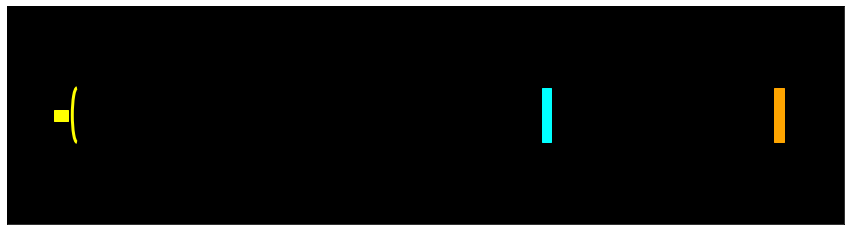

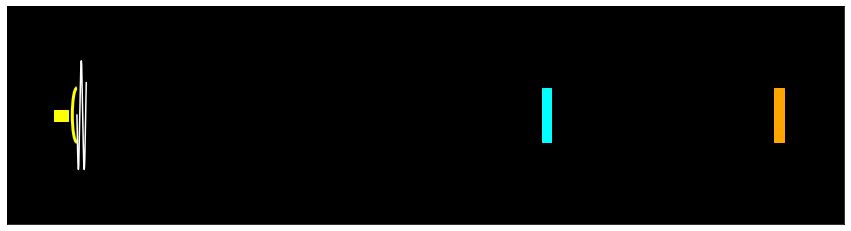

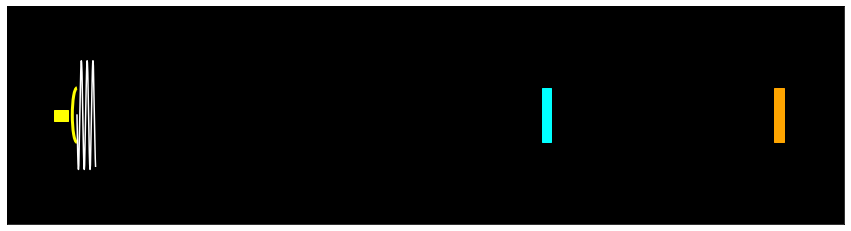

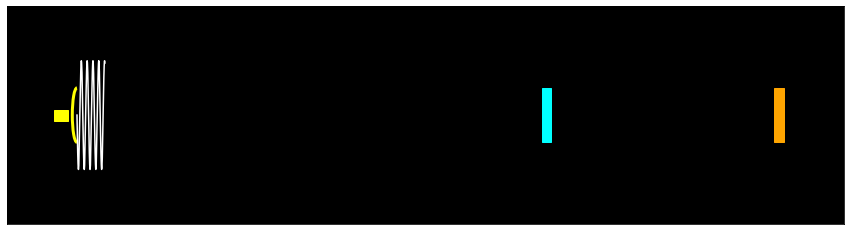

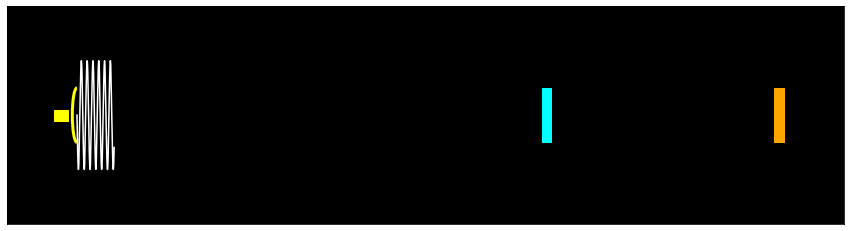

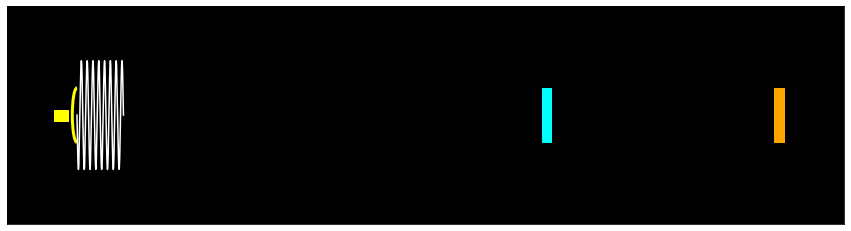

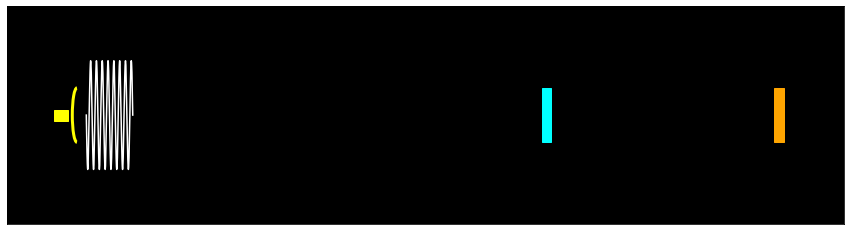

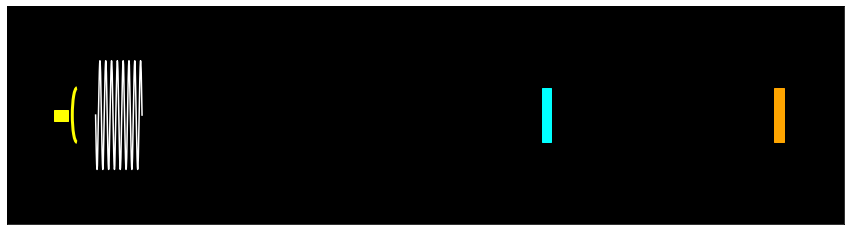

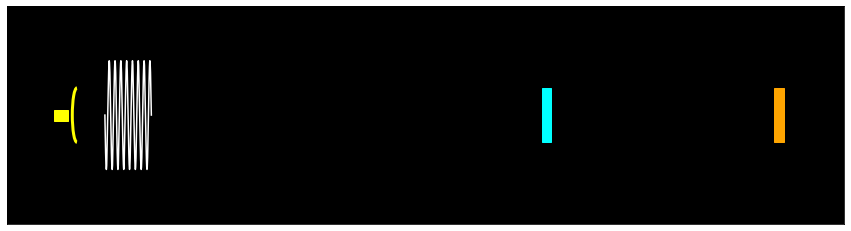

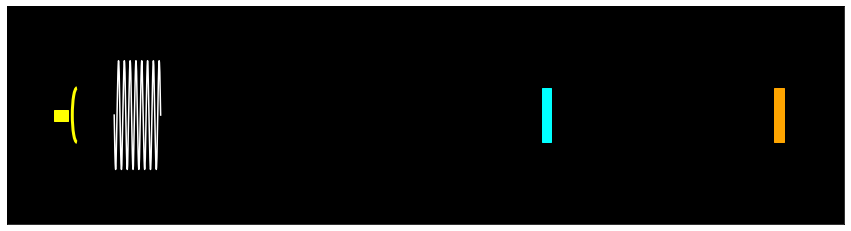

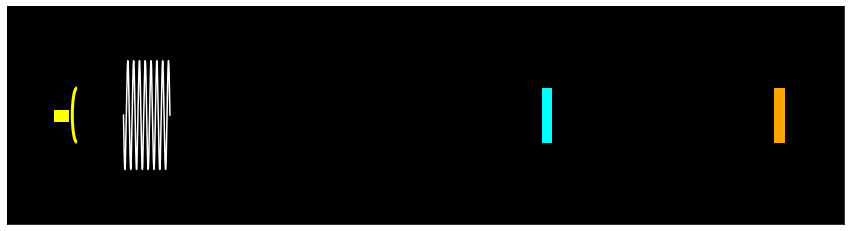

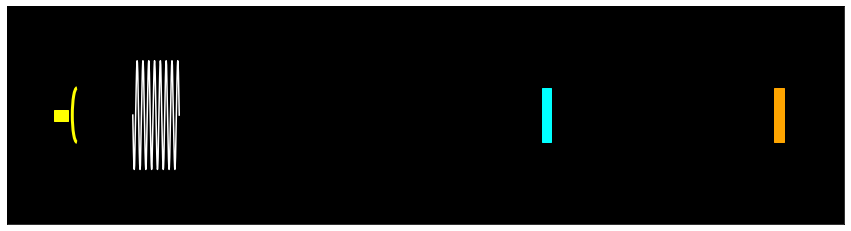

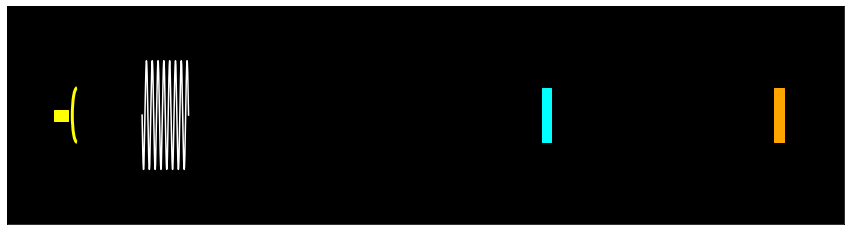

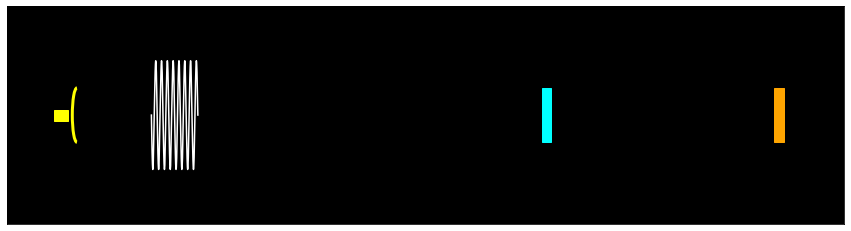

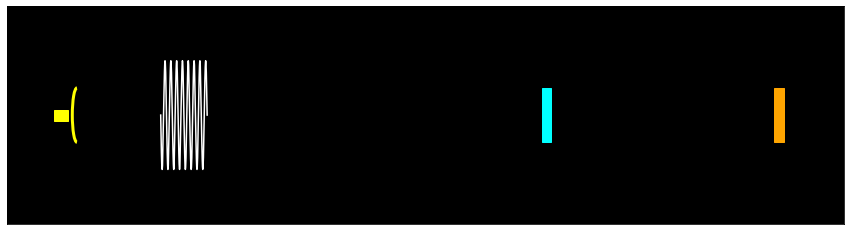

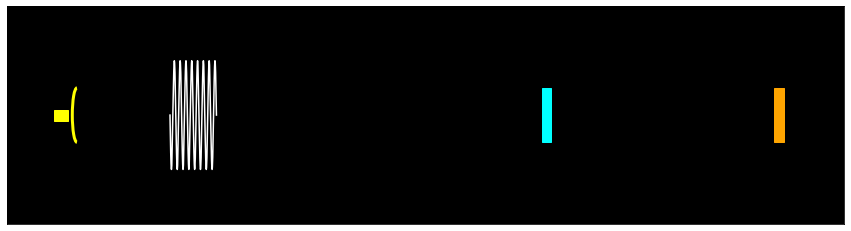

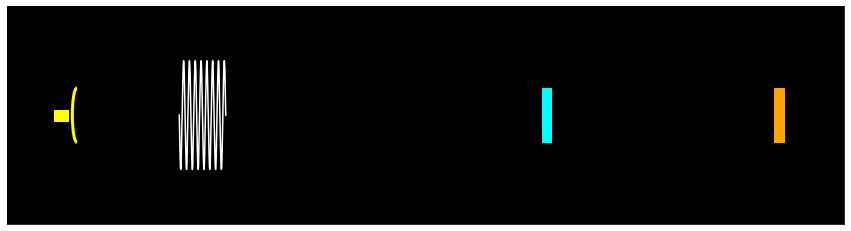

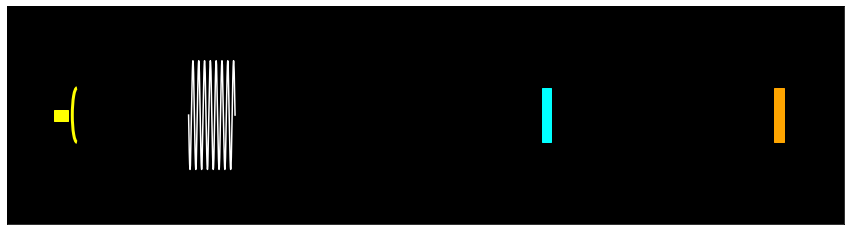

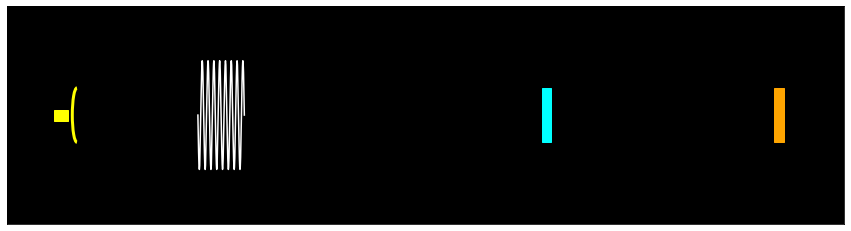

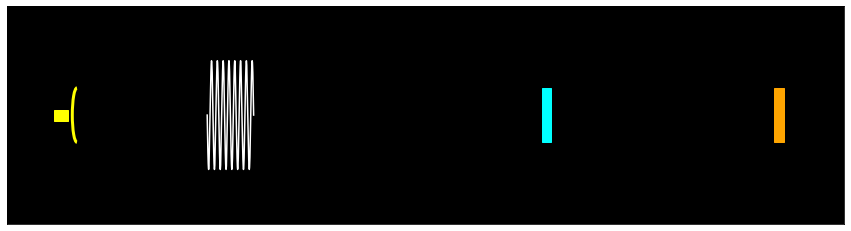

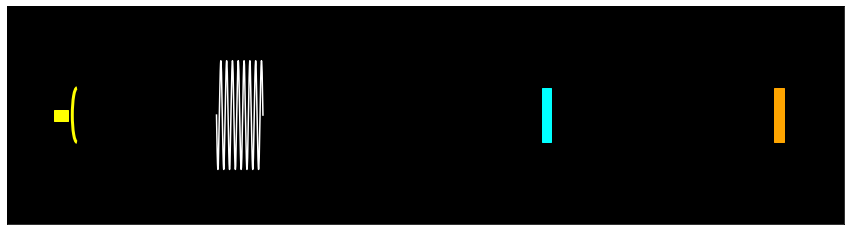

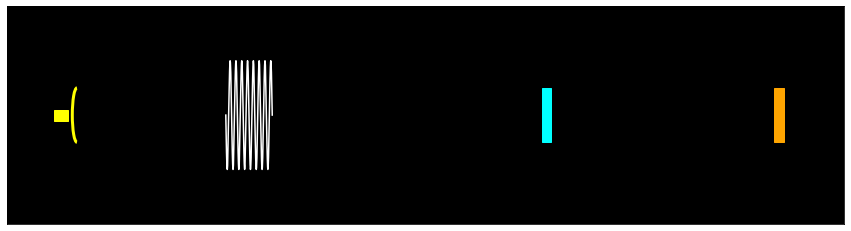

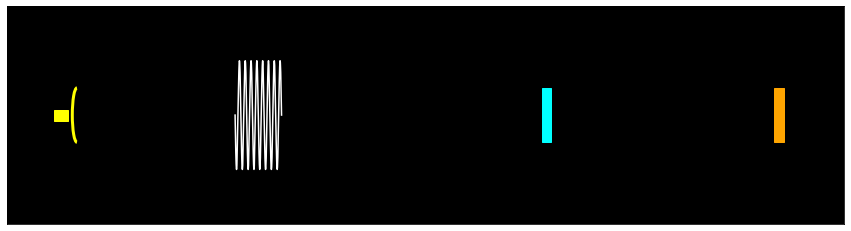

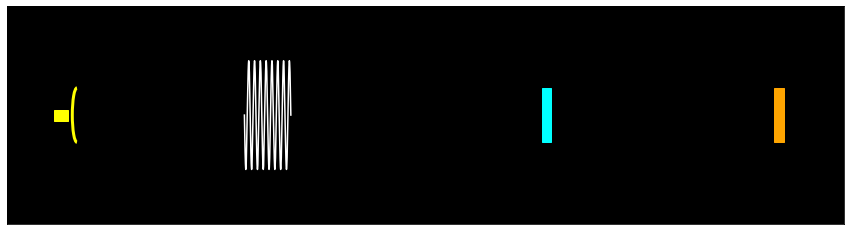

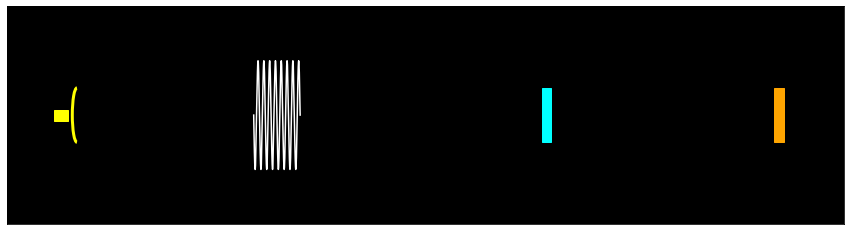

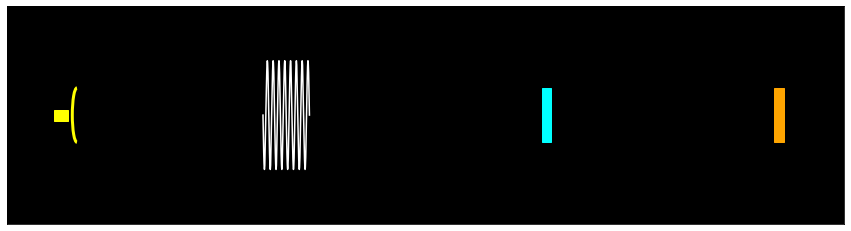

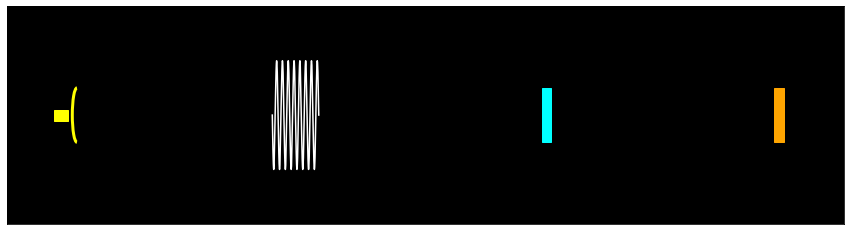

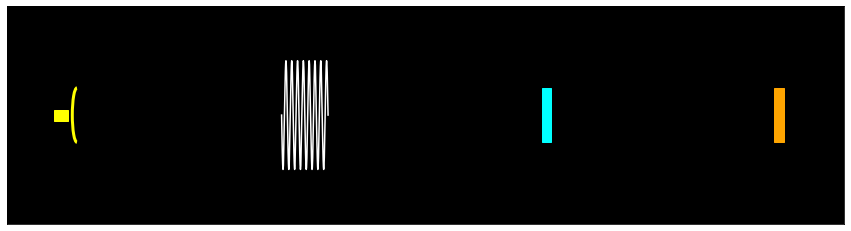

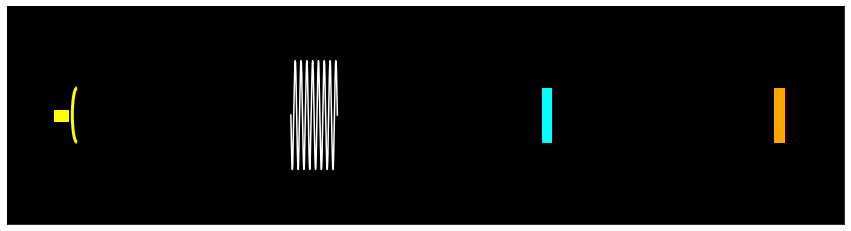

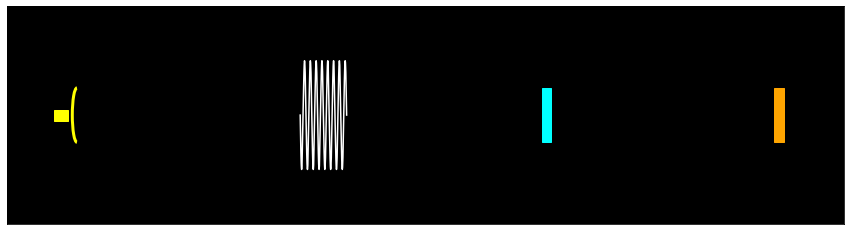

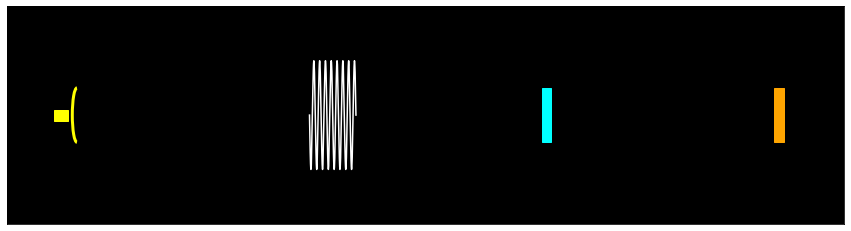

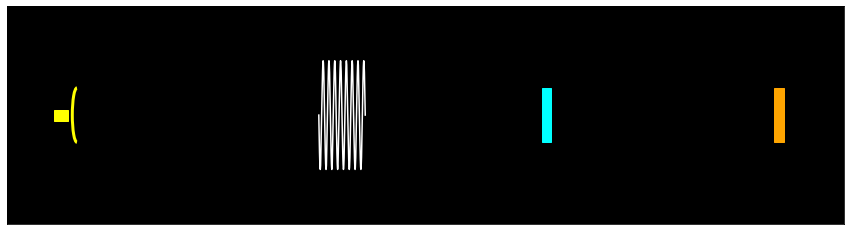

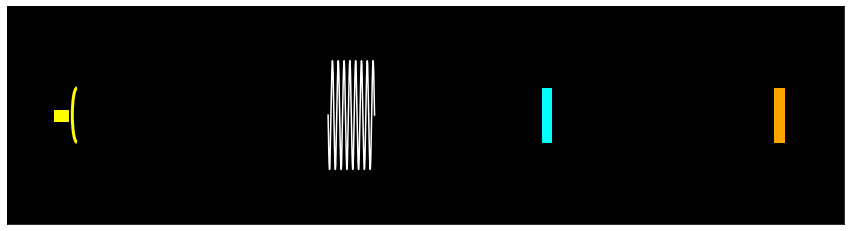

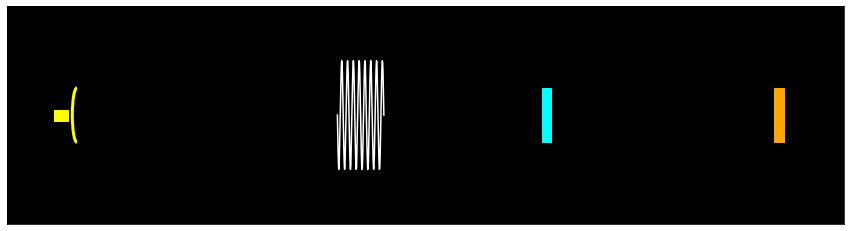

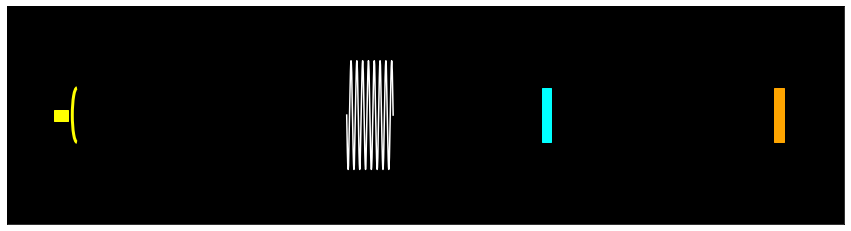

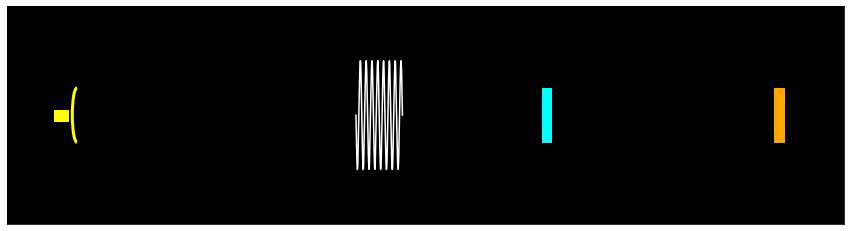

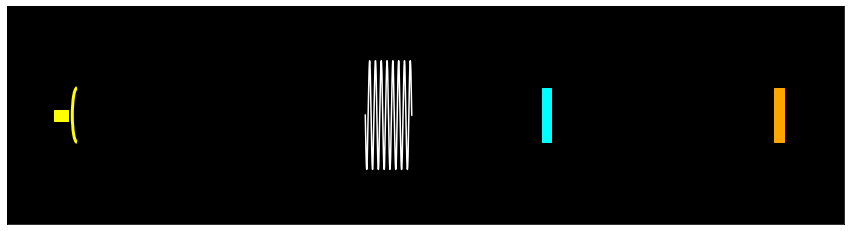

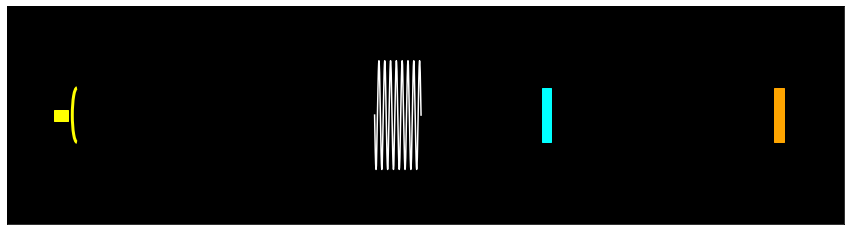

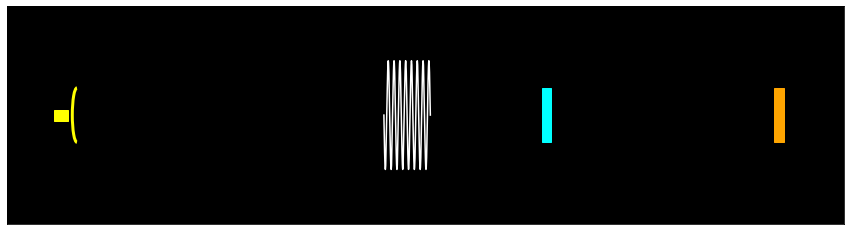

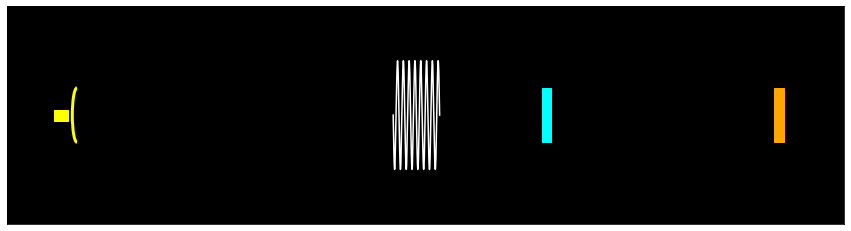

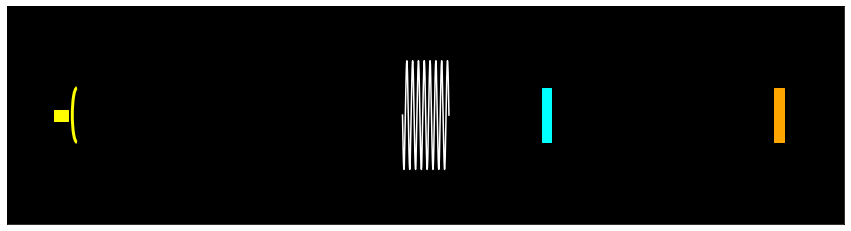

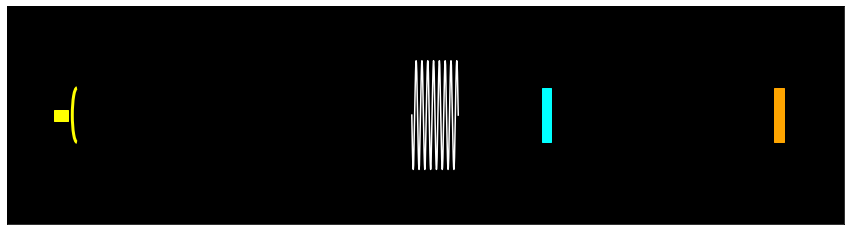

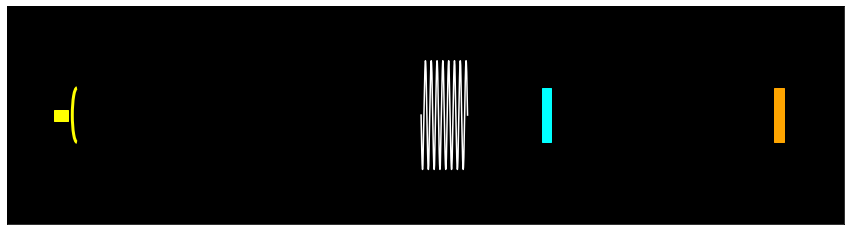

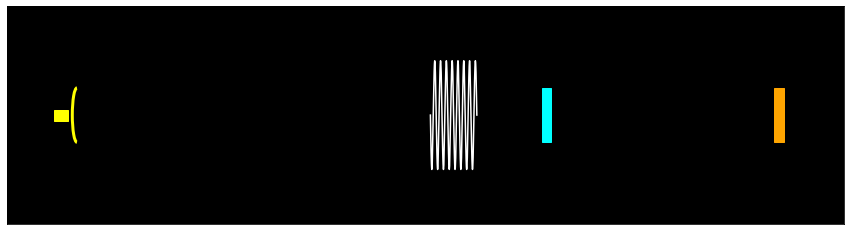

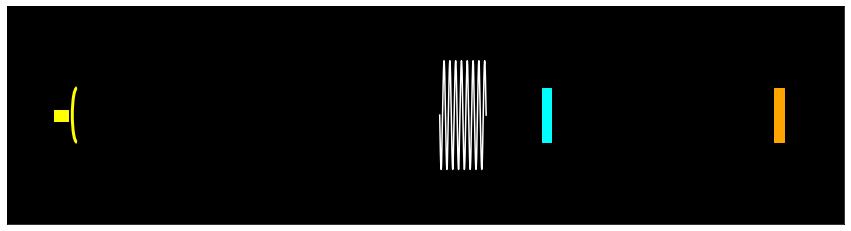

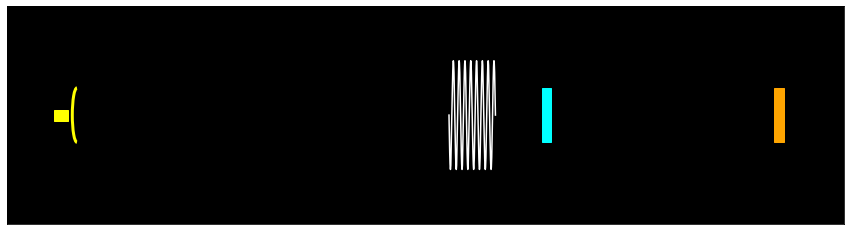

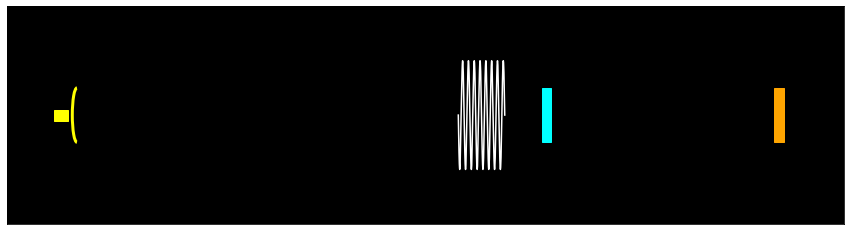

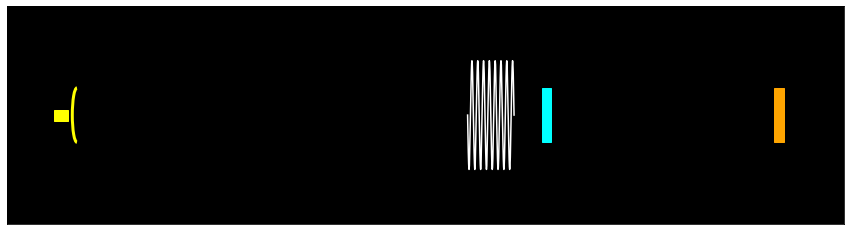

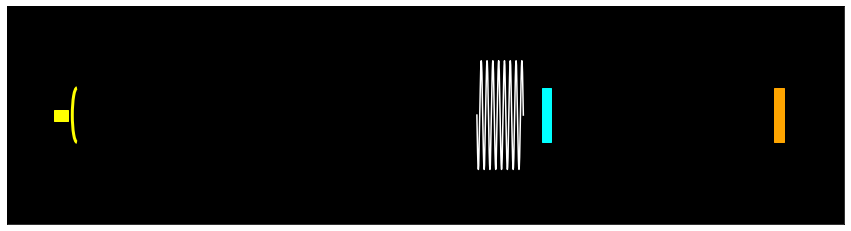

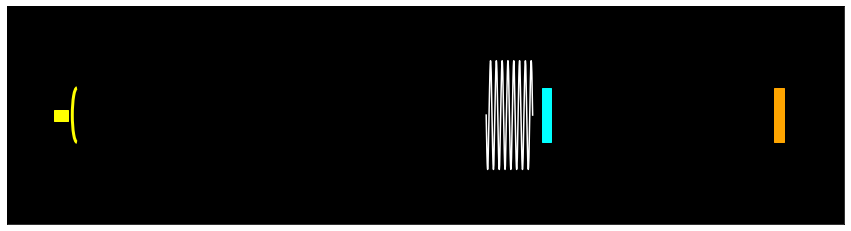

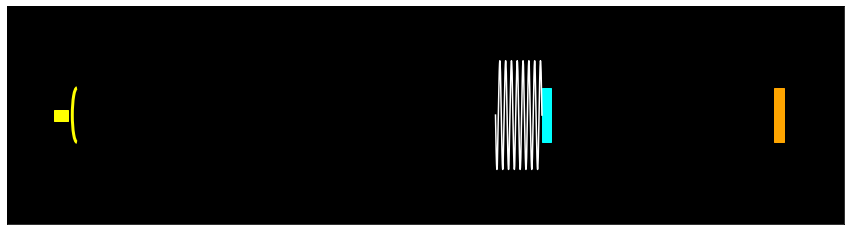

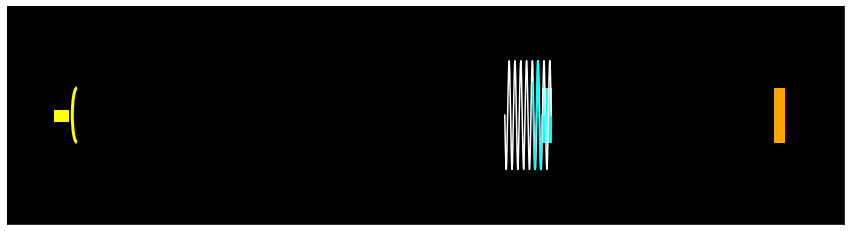

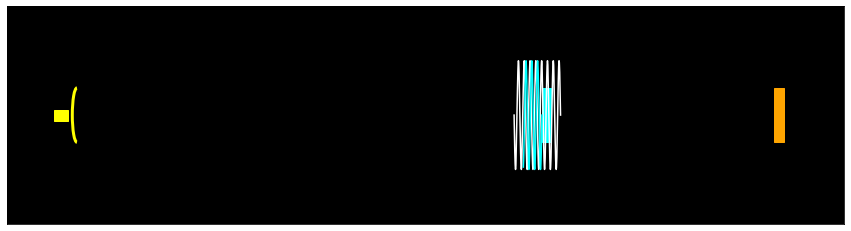

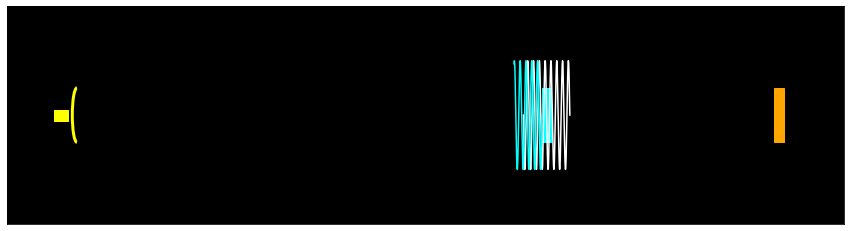

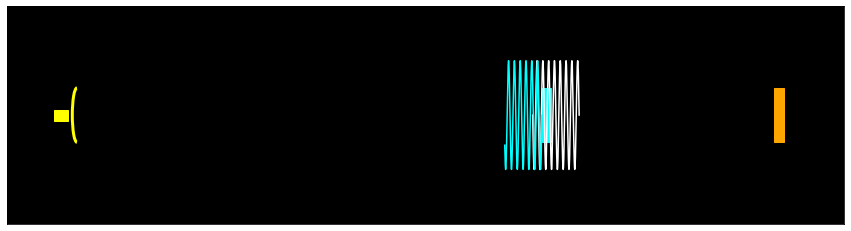

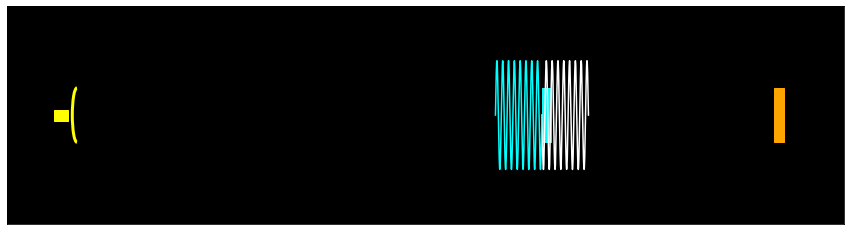

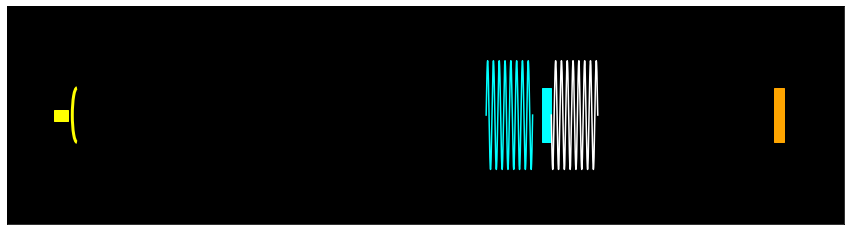

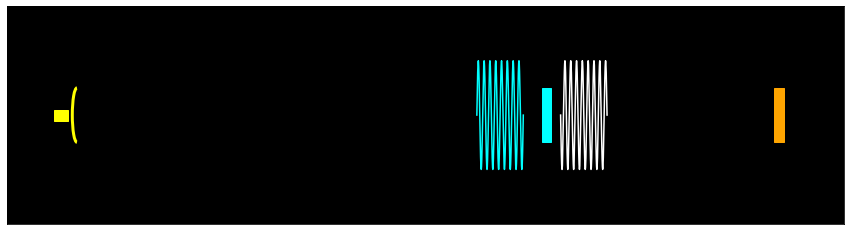

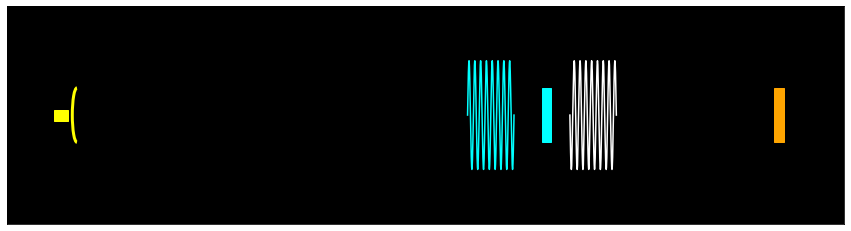

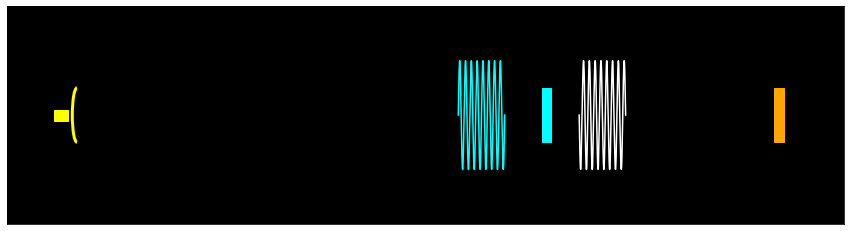

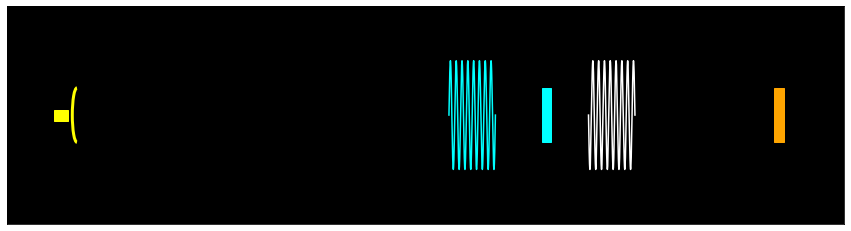

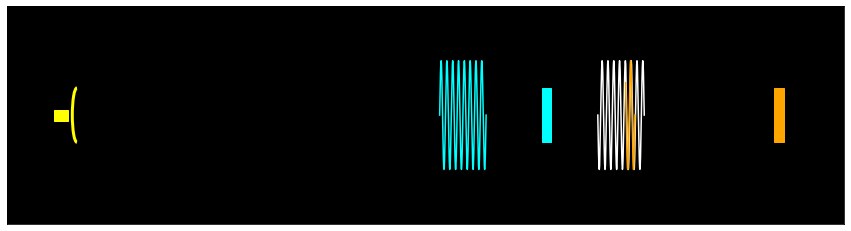

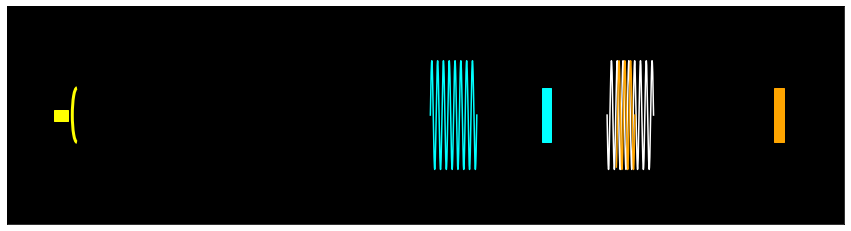

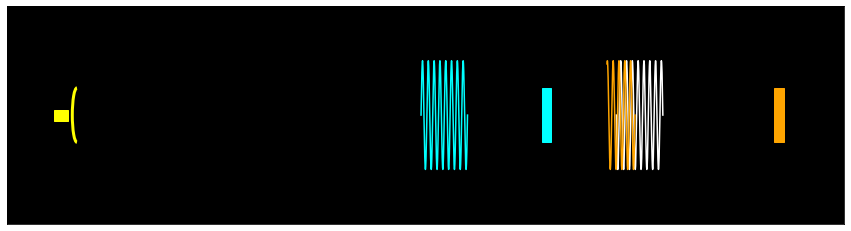

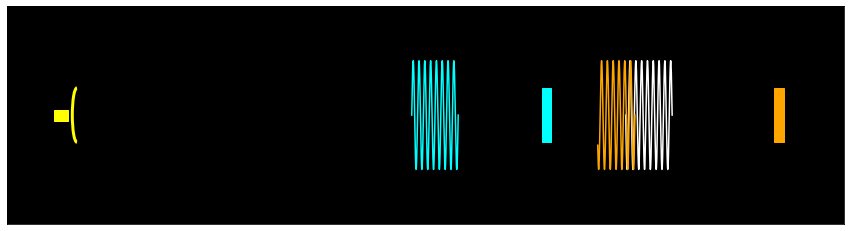

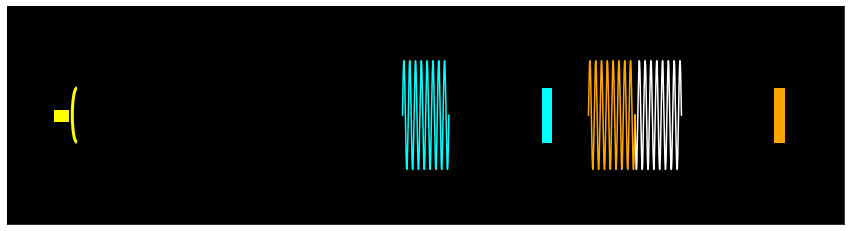

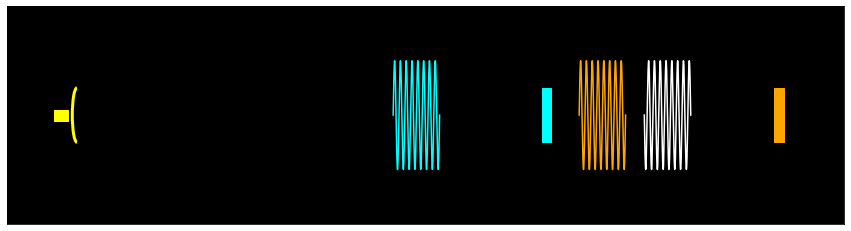

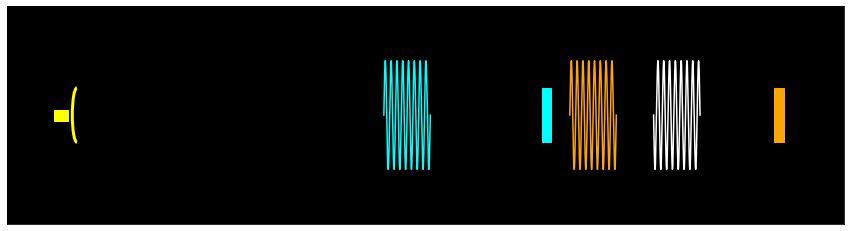

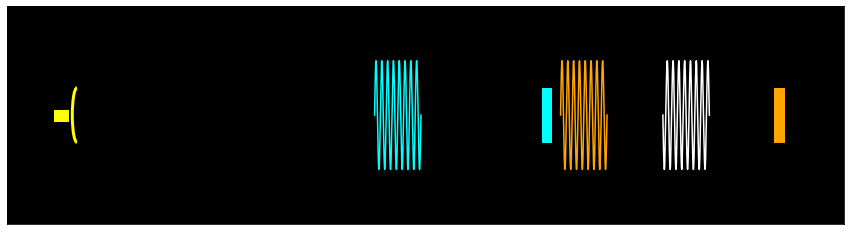

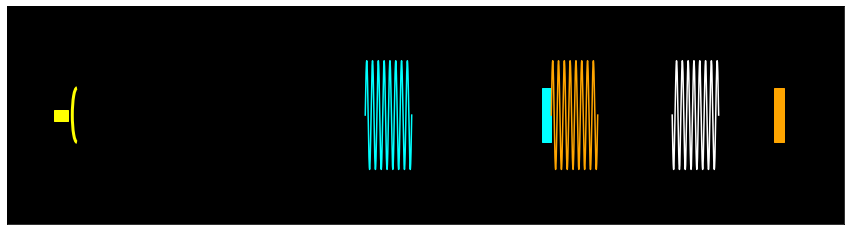

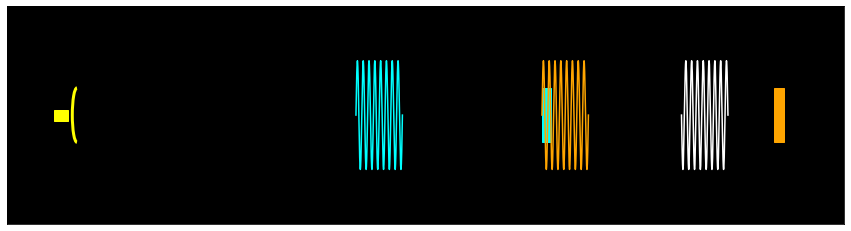

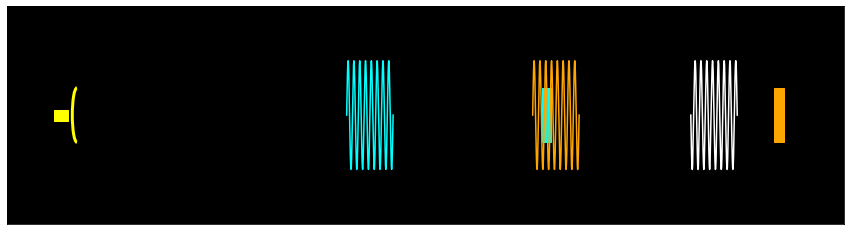

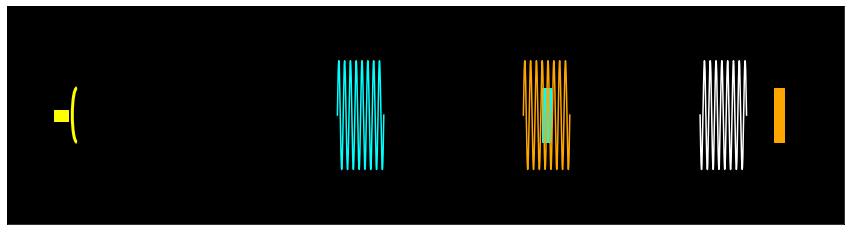

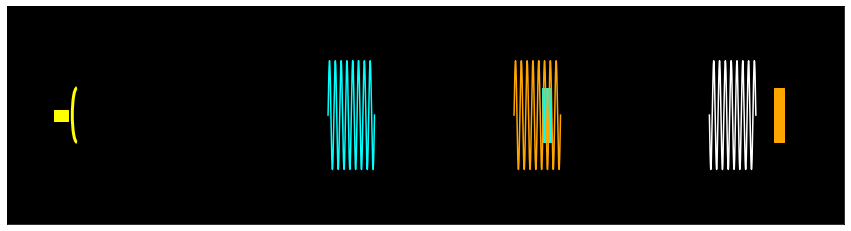

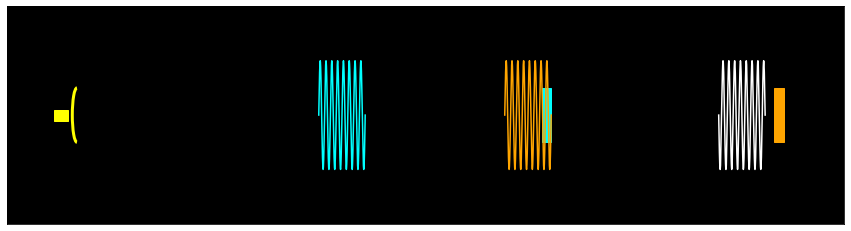

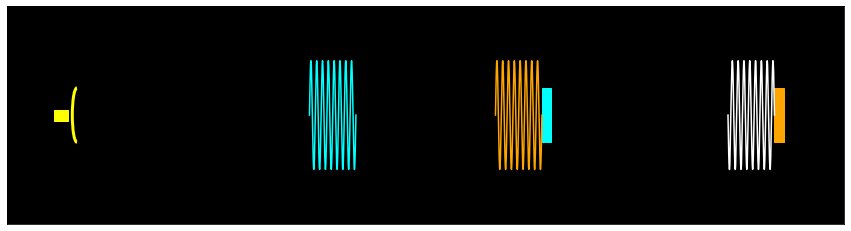

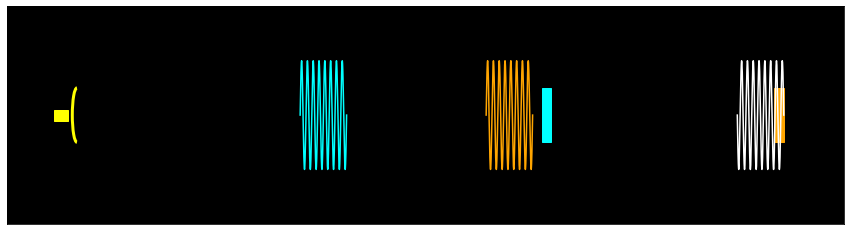

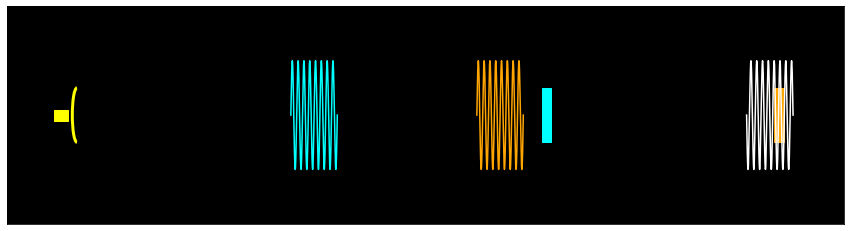

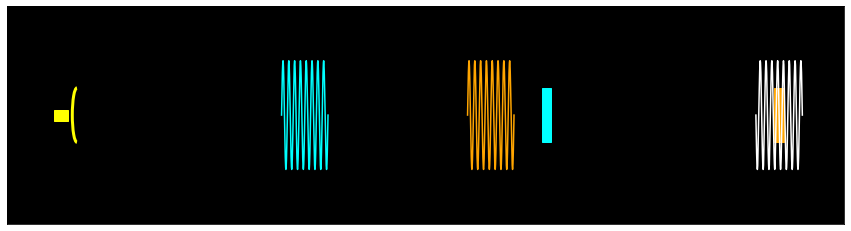

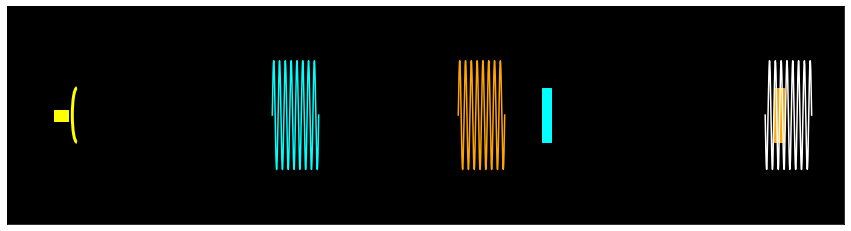

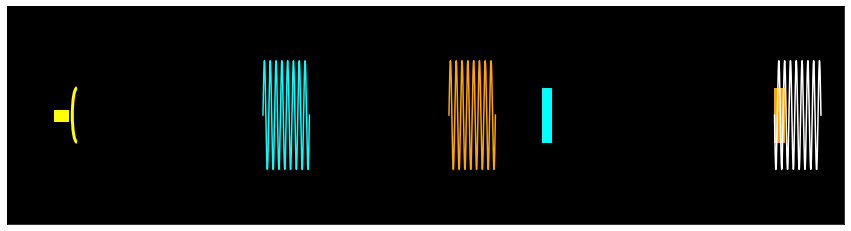

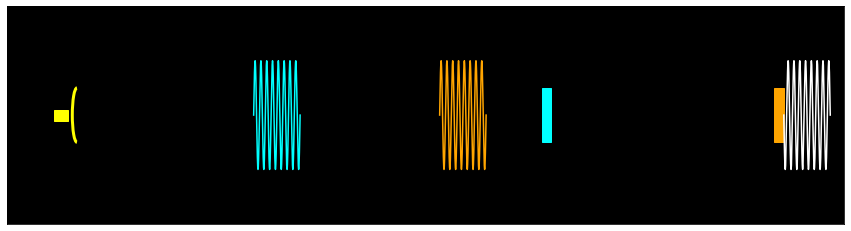

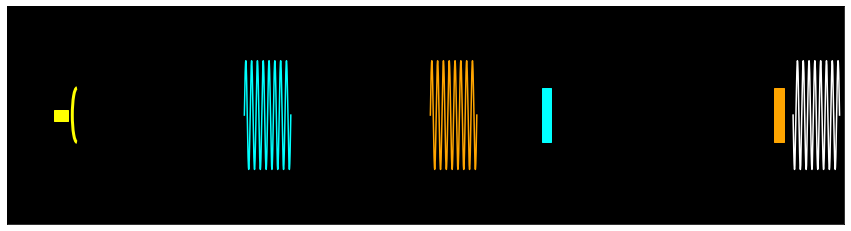

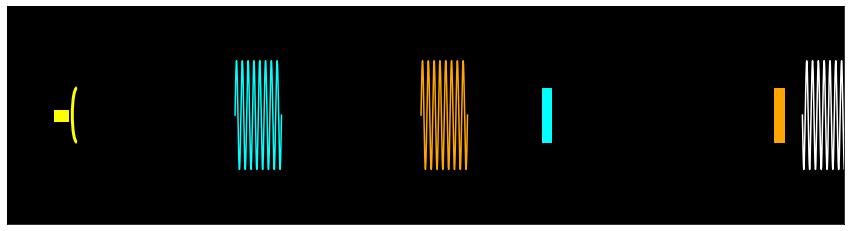

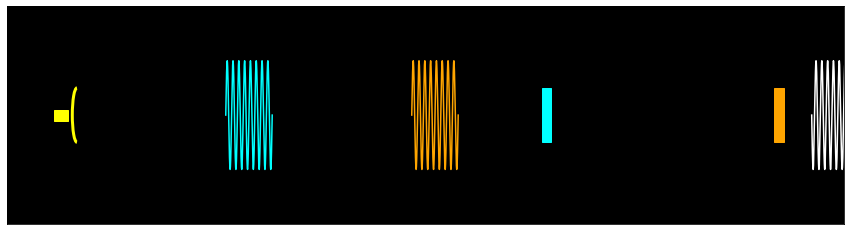

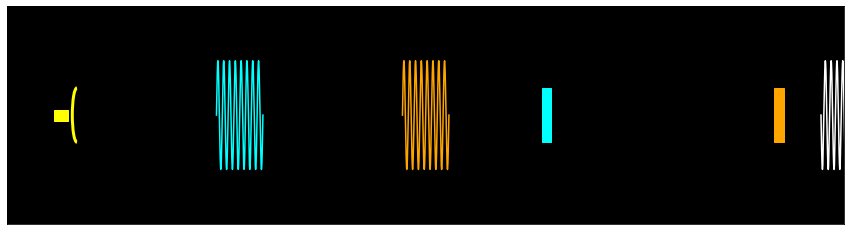

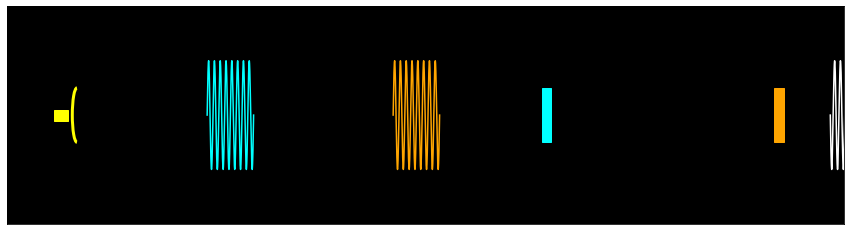

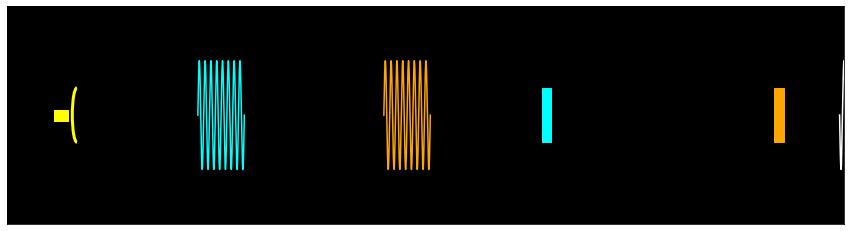

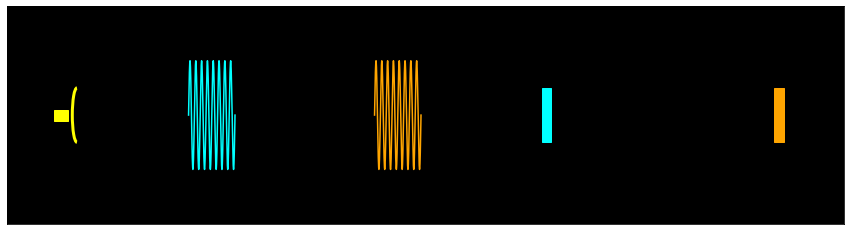

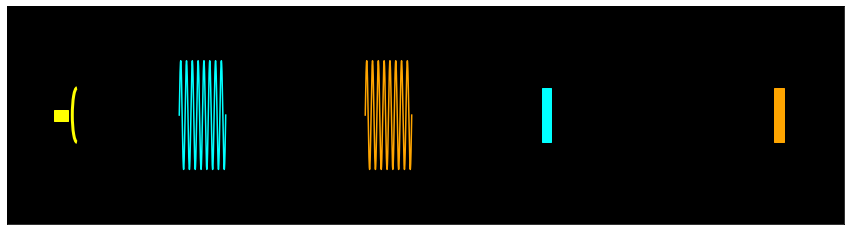

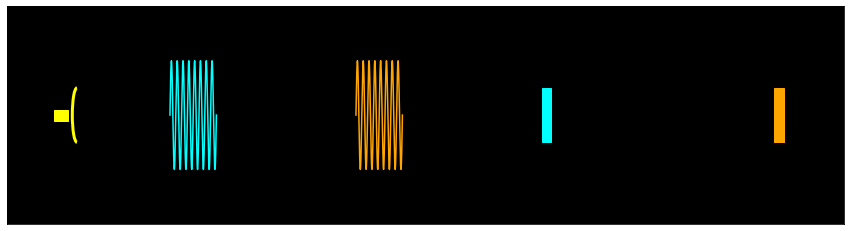

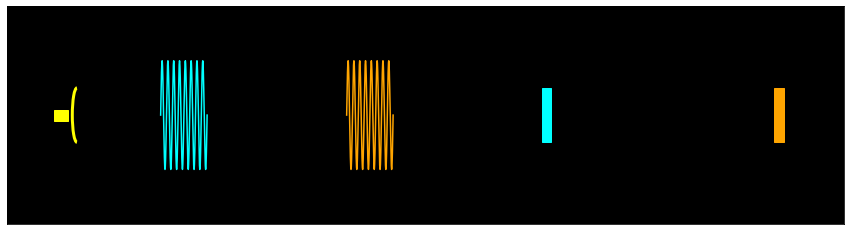

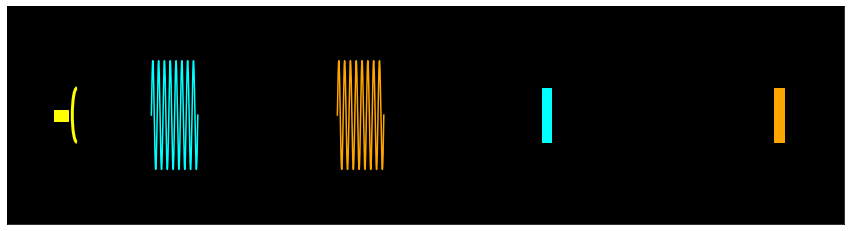

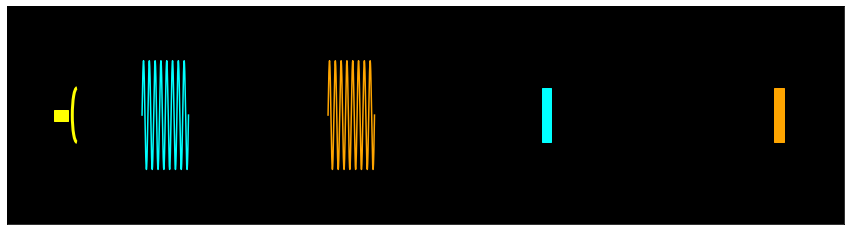

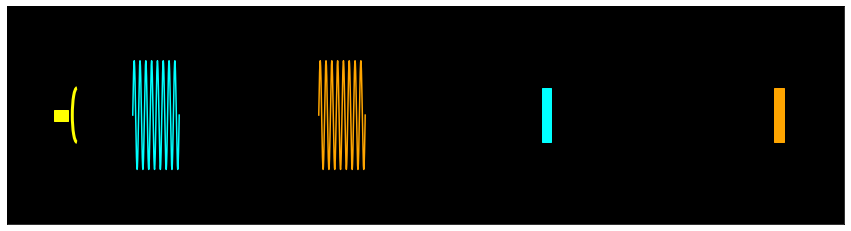

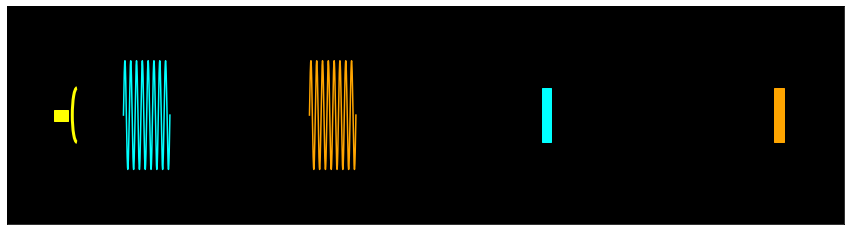

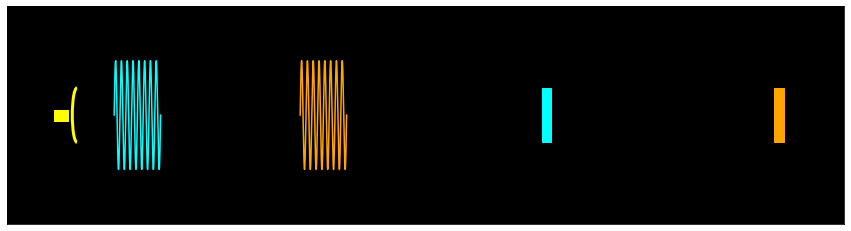

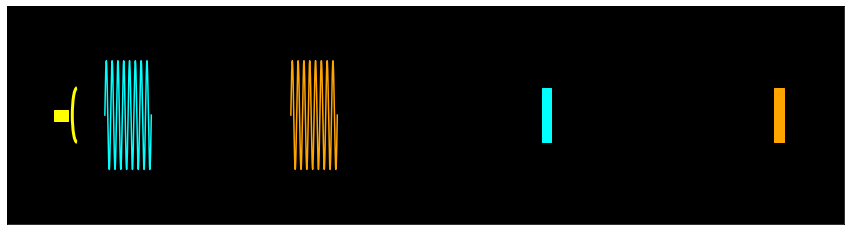

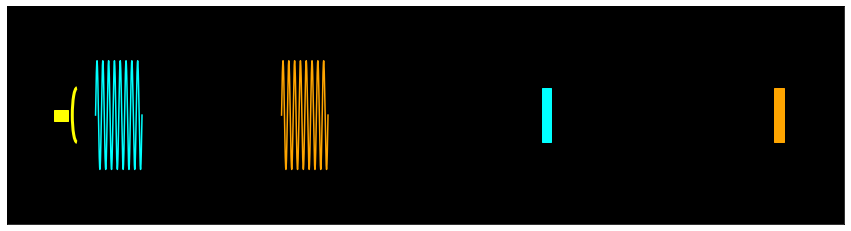

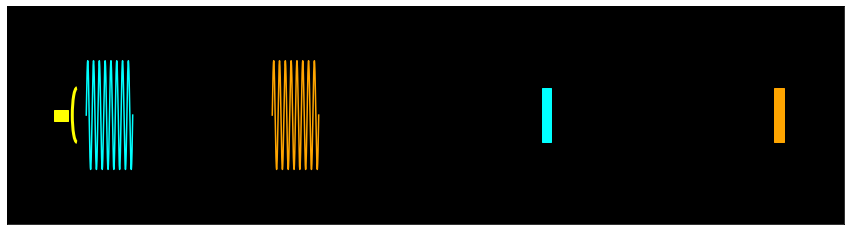

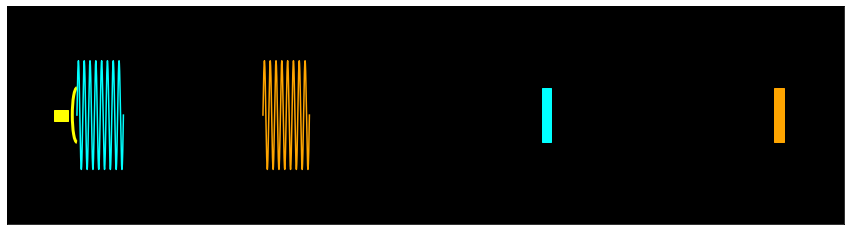

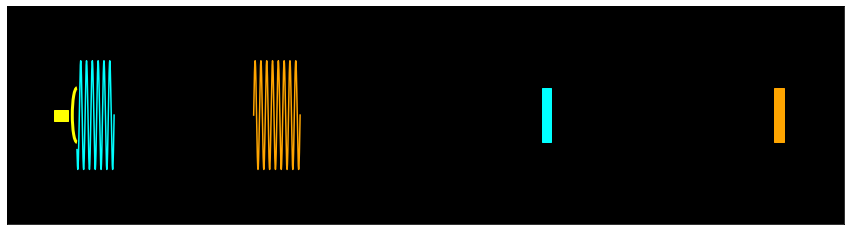

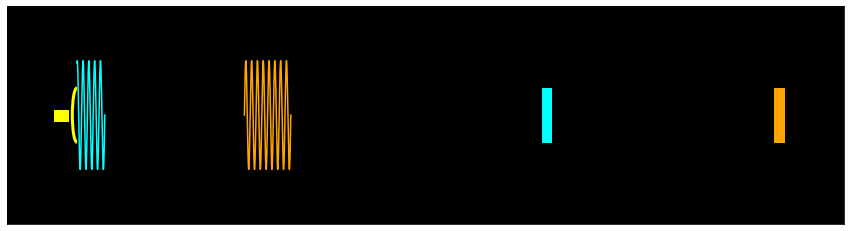

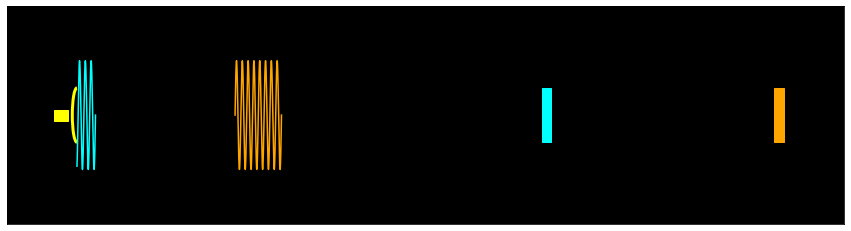

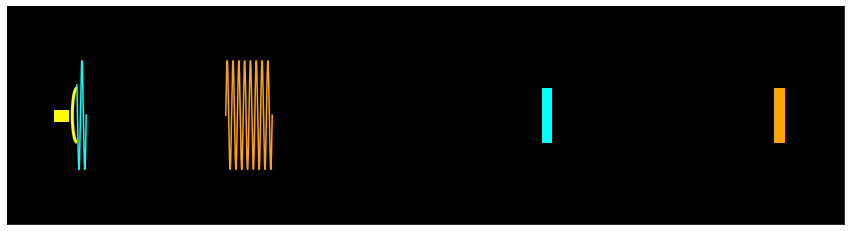

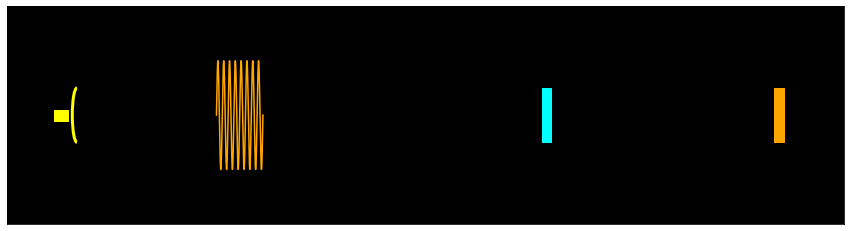

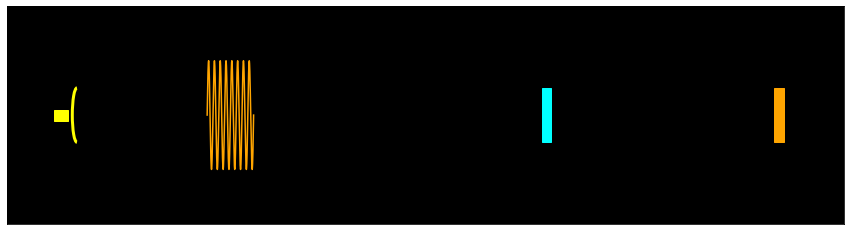

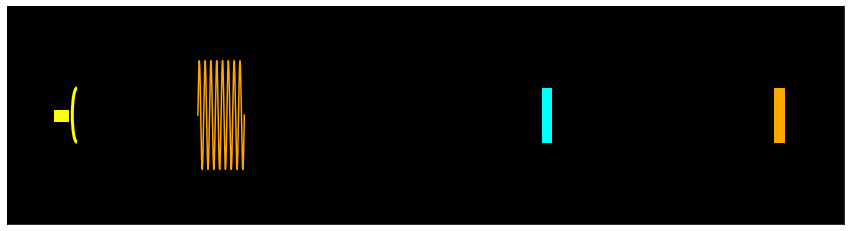

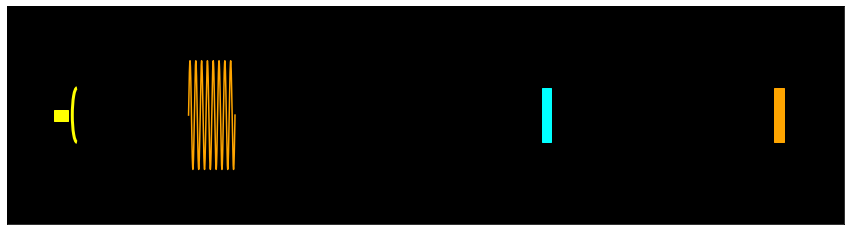

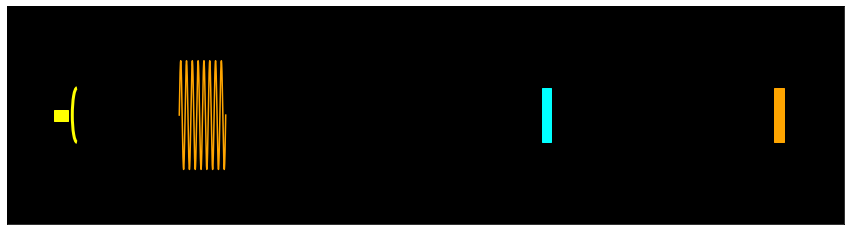

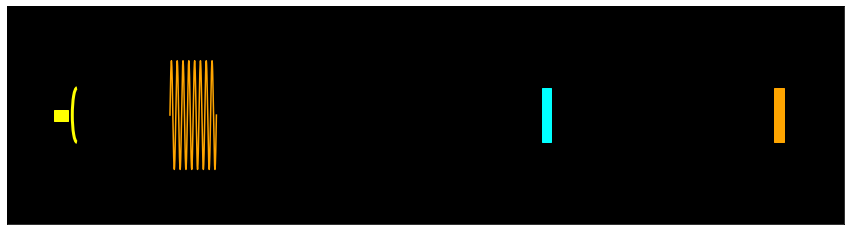

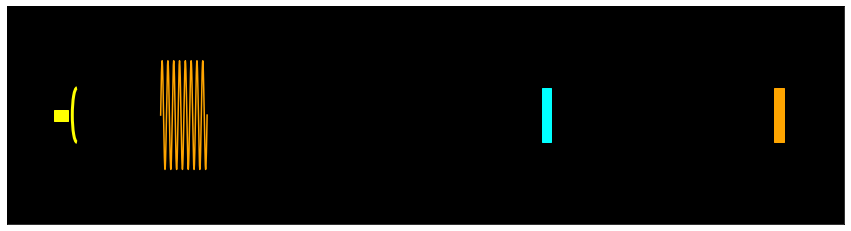

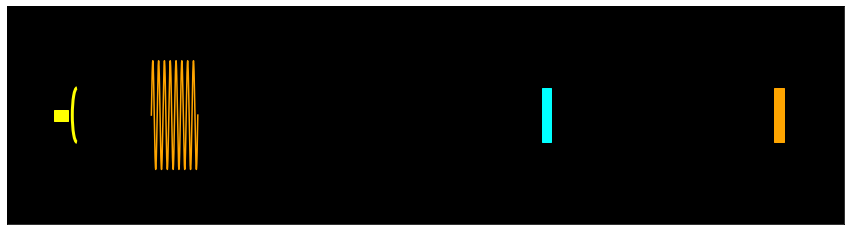

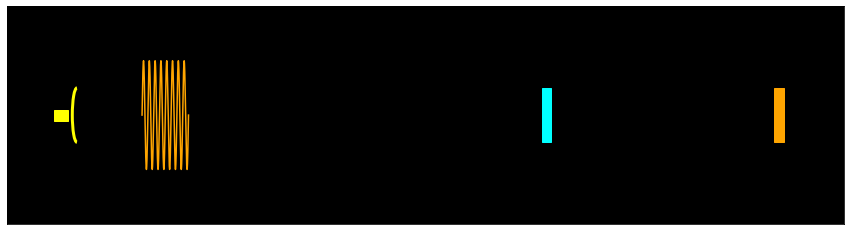

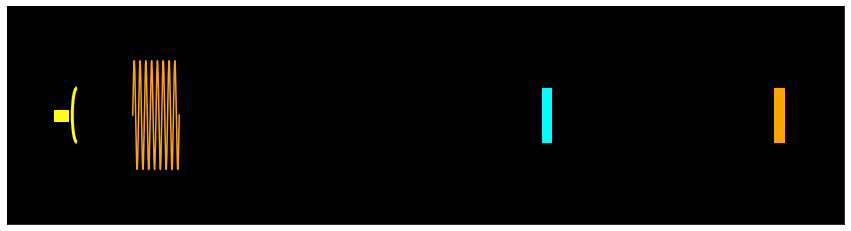

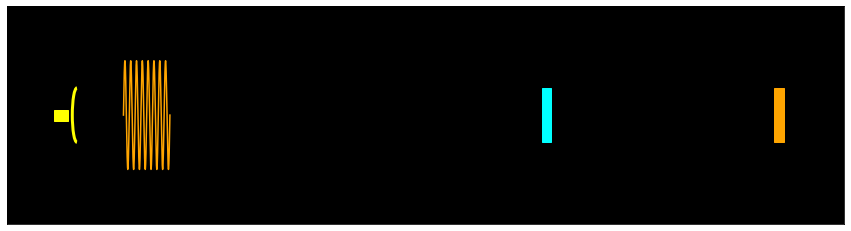

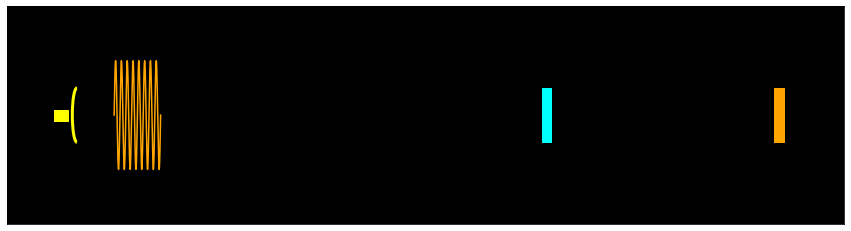

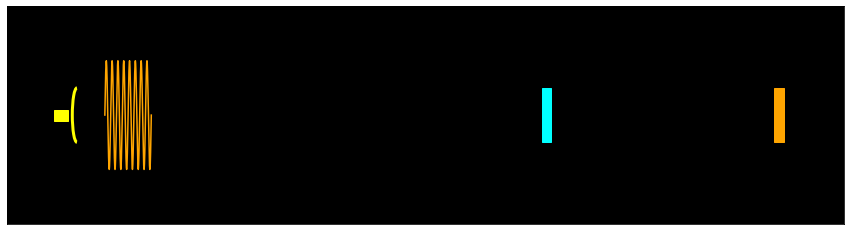

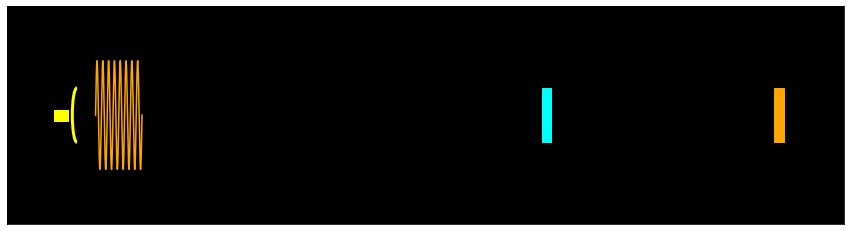

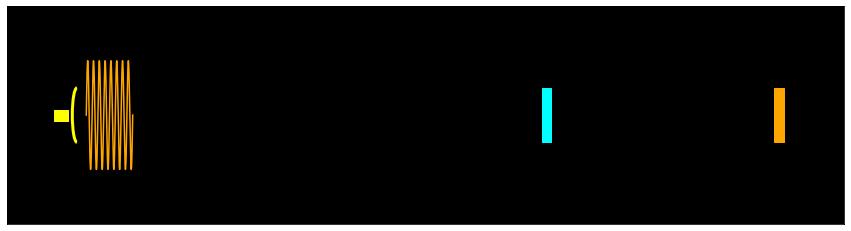

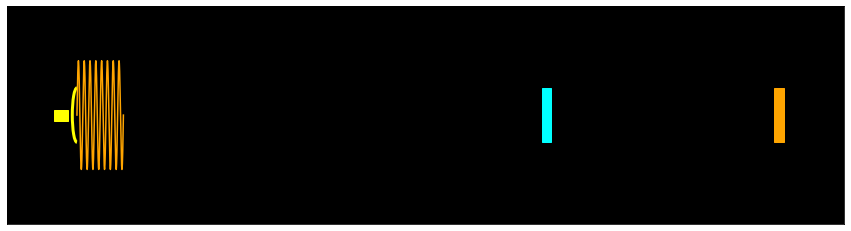

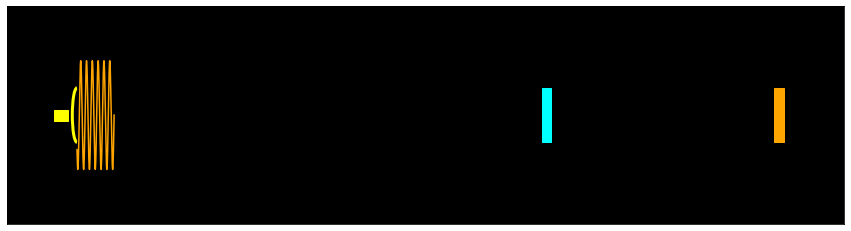

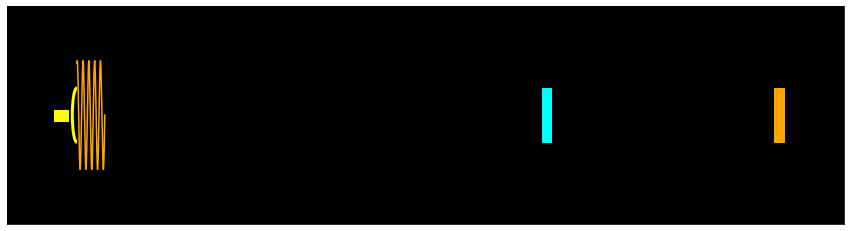

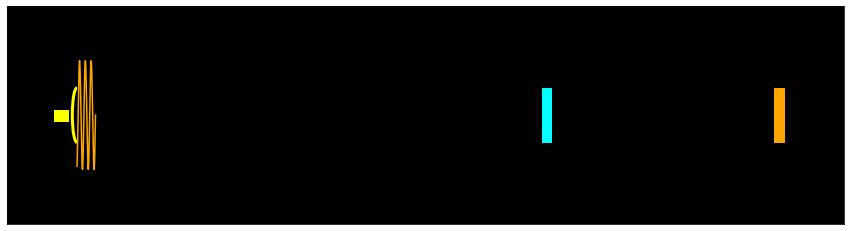

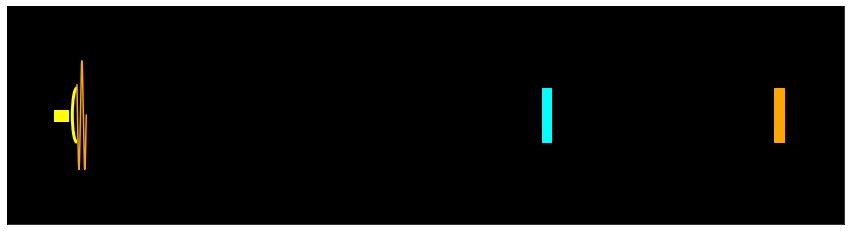

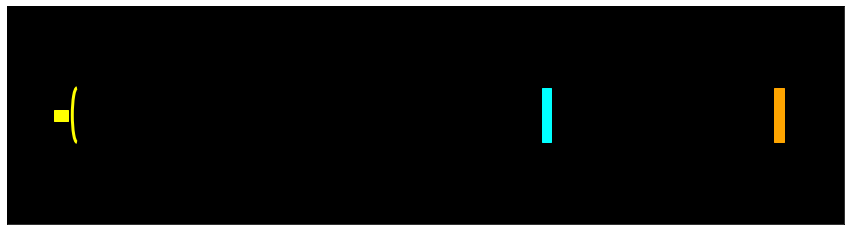

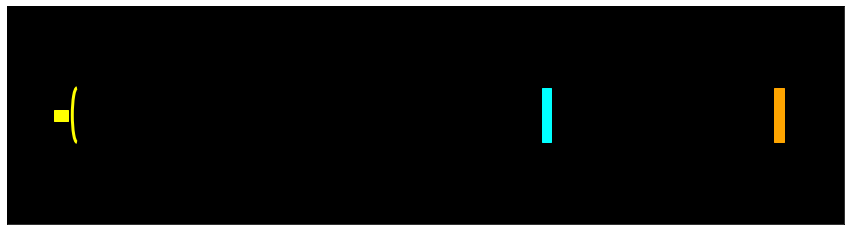

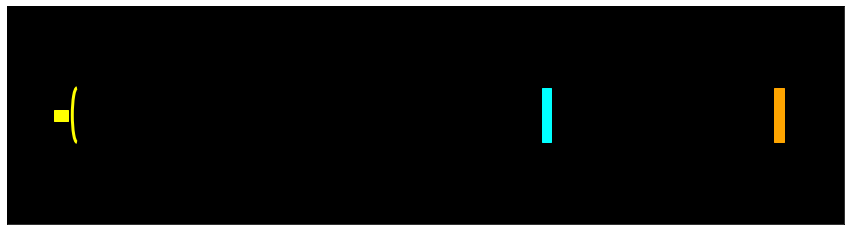

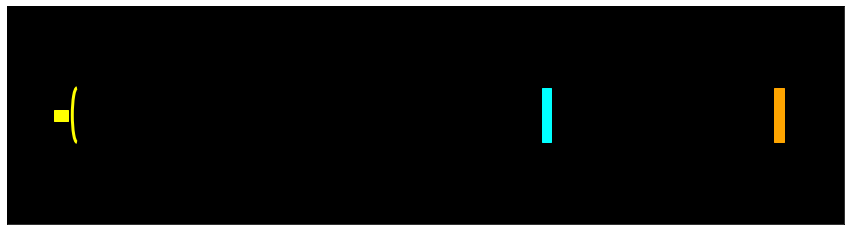

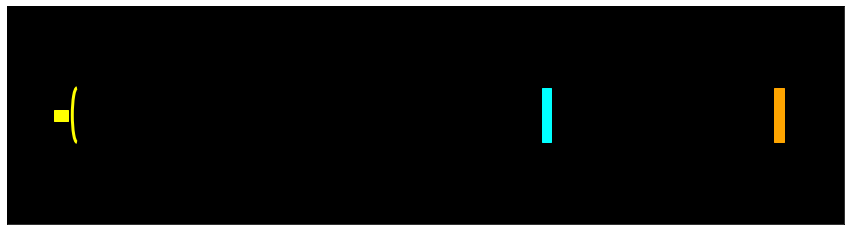

In [34]:
signal = pulse_y()

for i,t in enumerate(np.arange(0,256,2)):
    tx_x = pulse_x(t)
    r1_x = echo_x(t,1)
    r2_x = echo_x(t,1.2)
    fig,ax = plt.subplots(figsize=(15,4))
    ax.set_xlim((-.15,1.65))
    ax.set_ylim((-2,2))
    ax.tick_params(axis='x', which='both',bottom=False, top=False, labelbottom=False)
    ax.tick_params(axis='y', which='both',left=False, right=False, labelleft=False)
    if len(tx_x)>0:
        ax.plot(tx_x,signal[-len(tx_x):],'w')
    if len(r1_x)>0:
        ax.plot(r1_x,signal[-len(r1_x):],'cyan')
    if len(r2_x)>0:
        ax.plot(r2_x,signal[-len(r2_x):],'orange')
    tgt1 = patches.Rectangle((1,-.5),.02,1,color='cyan')
    tgt2 = patches.Rectangle((1.5,-.5),.02,1,color='orange')
    ant = patches.Arc((0,0),.02,1,theta1=90,theta2=270,linewidth=3,color='yellow')
    base = patches.Rectangle((-.05,-.1),.03,.2,color='yellow')
    ax.add_patch(tgt1)
    ax.add_patch(tgt2)
    ax.add_patch(ant)
    ax.add_patch(base)
    ax.set(facecolor='black')